In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

data = datasets.load_breast_cancer()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
df["target"] = data.target

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


array([[<AxesSubplot:xlabel='mean symmetry', ylabel='mean symmetry'>,
        <AxesSubplot:xlabel='mean fractal dimension', ylabel='mean symmetry'>,
        <AxesSubplot:xlabel='radius error', ylabel='mean symmetry'>,
        <AxesSubplot:xlabel='texture error', ylabel='mean symmetry'>],
       [<AxesSubplot:xlabel='mean symmetry', ylabel='mean fractal dimension'>,
        <AxesSubplot:xlabel='mean fractal dimension', ylabel='mean fractal dimension'>,
        <AxesSubplot:xlabel='radius error', ylabel='mean fractal dimension'>,
        <AxesSubplot:xlabel='texture error', ylabel='mean fractal dimension'>],
       [<AxesSubplot:xlabel='mean symmetry', ylabel='radius error'>,
        <AxesSubplot:xlabel='mean fractal dimension', ylabel='radius error'>,
        <AxesSubplot:xlabel='radius error', ylabel='radius error'>,
        <AxesSubplot:xlabel='texture error', ylabel='radius error'>],
       [<AxesSubplot:xlabel='mean symmetry', ylabel='texture error'>,
        <AxesSubplot:xlabel='me

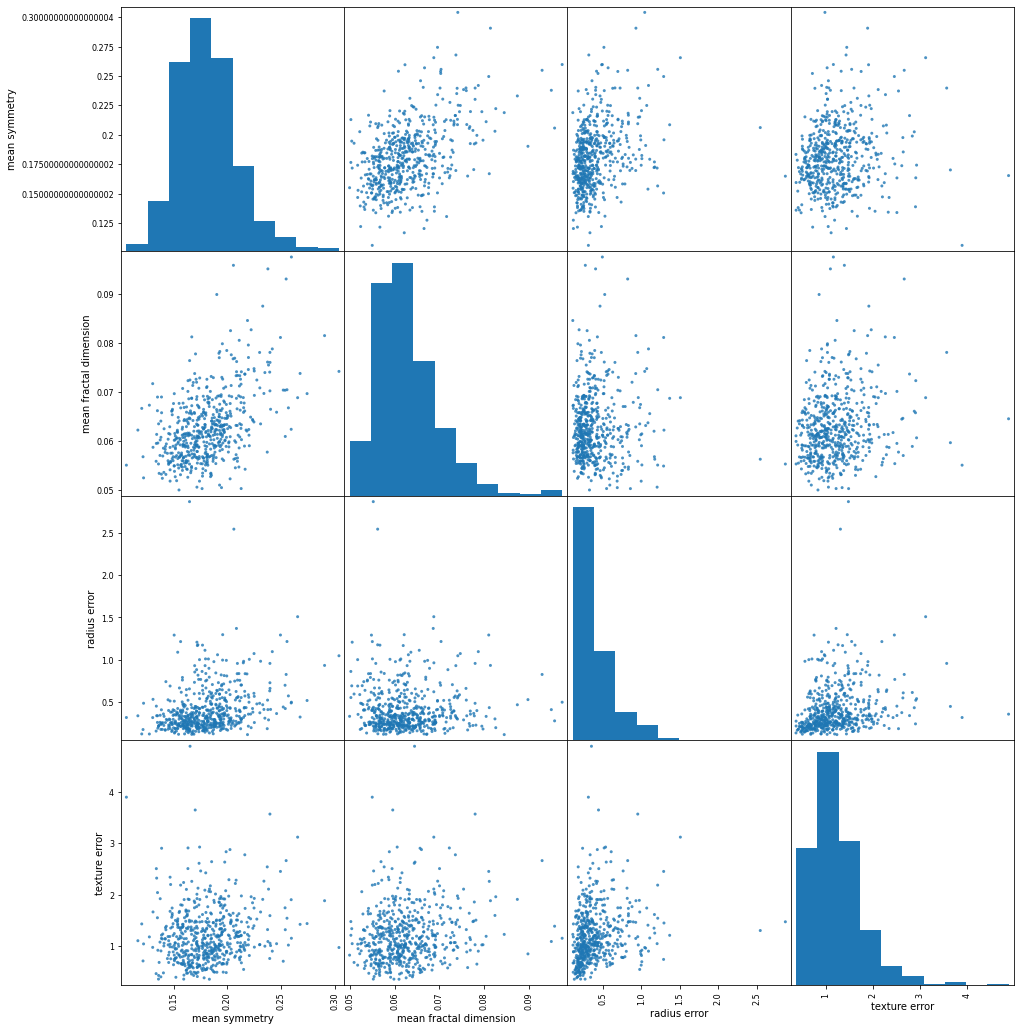

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[df.columns[8:12]], figsize=(16,18), alpha=0.8)

In [15]:
df1 = df[["mean symmetry","mean fractal dimension","target"]].copy()

In [16]:
df1.head()

,mean symmetry,mean fractal dimension,target
0,0.2419,0.07871,0
1,0.1812,0.05667,0
2,0.2069,0.05999,0
3,0.2597,0.09744,0
4,0.1809,0.05883,0


In [17]:
df1.shape

(569, 3)

In [18]:
df1.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [21]:
df1.drop(df1[df1.target == 0].index, axis=0, inplace=True)

In [22]:
df1.columns

Index(['mean symmetry', 'mean fractal dimension', 'target'], dtype='object')

Text(0.5, 1.0, 'Graph to show distribution')

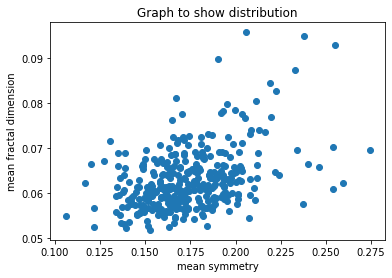

In [24]:
plt.scatter(df1["mean symmetry"], df1["mean fractal dimension"])
plt.xlabel("mean symmetry")
plt.ylabel("mean fractal dimension")
plt.title("Graph to show distribution")

At this point we have reached to our final dataframe on the top of which we can apply or practice the techniques of outlier detection.

The data frame is stored in the df1 variable, where we have these fields.
- mean symmetry
- mean fractal dimension
- target

### Detecting the outliers with z score

Basically z score tells that which data point is how much far from the mean.

In [32]:
Z_score_ms = abs((df1[df1.columns[0]] - df1[df1.columns[0]].mean())/df1[df1.columns[0]].std())
Z_score_mfd = abs((df1[df1.columns[1]] - df1[df1.columns[1]].mean())/df1[df1.columns[1]].std())

In [34]:
df1["Z_score_ms"] = Z_score_ms
df1["Z_score_mfd"] = Z_score_mfd

In [35]:
df1.head()

,mean symmetry,mean fractal dimension,target,Z_score_ms,Z_score_mfd
19,0.1885,0.05766,1,0.577020,0.771770
20,0.1967,0.06811,1,0.907575,0.776988
21,0.1815,0.06905,1,0.294839,0.916302
37,0.1467,0.05863,1,1.108004,0.628009
46,0.1769,0.06503,1,0.109406,0.320512


In [39]:
df1.shape

(357, 5)

In [60]:
target_of_Zscore = df1[(df1.Z_score_ms >= 2) | (df1.Z_score_mfd >= 2)]

Text(0.5, 1.0, 'Target of Z score')

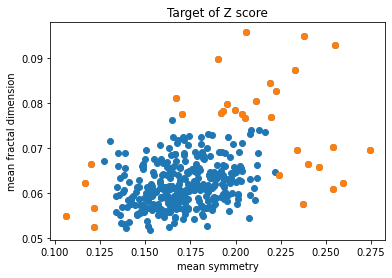

In [66]:
plt.scatter(df1["mean symmetry"], df1["mean fractal dimension"])
plt.scatter(target_of_Zscore["mean symmetry"], target_of_Zscore["mean fractal dimension"])
plt.xlabel("mean symmetry")
plt.ylabel("mean fractal dimension")
plt.title("Target of Z score")

This is an example that how we can detect the outliers with z score and the results are amazing. The data points which are in orange are targated by the z score.

### Detecting the outliers with IQR

Here we can detect the outliers with the help of quartiles. On the dataset we use to apply lower bound and upper, then we prefer only that data which lies b/w the upper and lower bound.

Upper_bound = q3 + 1.5*IQR
Lower_bound = q1 - 1.5*IQR

where q1 = 25 percentile, q2 = 50 percentile, q3 = 75 percentile, IQR = q3 - q1
    

mean symmetry                AxesSubplot(0.125,0.125;0.352273x0.755)
mean fractal dimension    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

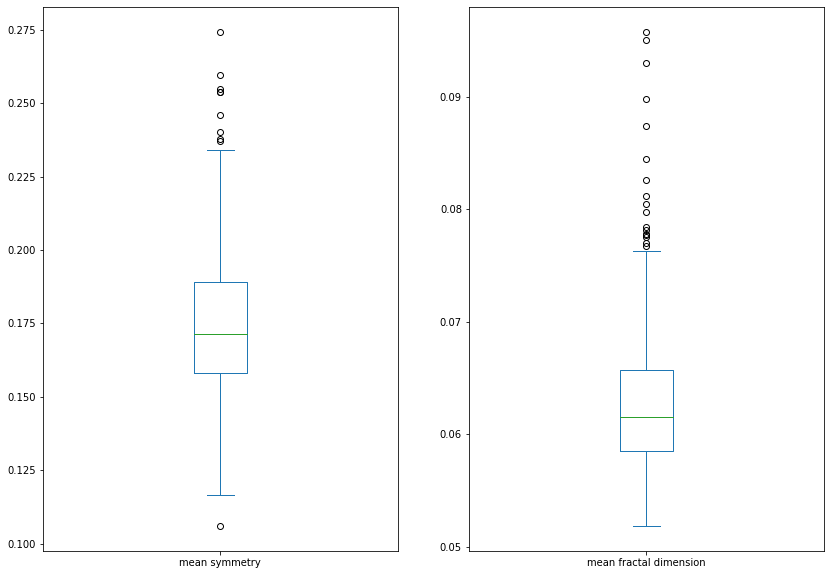

In [79]:
df1[df1.columns[0:2]].plot(kind="box", subplots=True, figsize=(14,10))

These are the box plots for the individual fields in the dataframe

In [83]:
# Values for mean symmetry
q1_ms = df1[df1.columns[0]].quantile(0.25)
q2_ms = df1[df1.columns[0]].quantile(0.50)
q3_ms = df1[df1.columns[0]].quantile(0.75)
IQR_ms = q3_ms - q1_ms 

# Values for mean fractal dimension
q1_mft = df1[df1.columns[1]].quantile(0.25)
q2_mft = df1[df1.columns[1]].quantile(0.50)
q3_mft = df1[df1.columns[1]].quantile(0.75)
IQR_mft = q3_mft - q1_mft

In [84]:
# lower and upper bounds for mean symmetry
lower_bound_ms = q1_ms - 1.5*IQR_ms
upper_bound_ms = q3_ms + 1.5*IQR_ms

# lower and upper bounds for mean fractal dimension
lower_bound_mft = q1_mft - 1.5*IQR_mft
upper_bound_mft = q3_mft + 1.5*IQR_mft

In [90]:
df1[(df1["mean symmetry"]<lower_bound_ms) | (df1["mean symmetry"]>upper_bound_ms)]

,mean symmetry,mean fractal dimension,target,Z_score_ms,Z_score_mfd
60,0.2743,0.06960,1,4.035755,0.997816
76,0.2403,0.06641,1,2.665161,0.525037
150,0.2540,0.06087,1,3.217430,0.296027
152,0.2548,0.09296,1,3.249679,4.459919
288,0.2595,0.06233,1,3.439144,0.079645
349,0.2459,0.06581,1,2.890906,0.436113
424,0.2538,0.07029,1,3.209368,1.100078
443,0.2372,0.05768,1,2.540195,0.768806
504,0.2378,0.09502,1,2.564382,4.765225
561,0.1060,0.05502,1,2.748686,1.163035
